In [41]:
'''
Finding the location with the most scooters:
    By plotting a scatter plot of all the data, expectedly, I found that scooters were located in clumps. Additionally,
there seems to be 3 specific locations in which most scooters reside (lower left grouping, bottom middle grouping, 
and upper right grouping). Althought the upper right grouping had almost twice the number of scooters in the first 
grouping and in the second grouping, the upper right grouping is much more spread out (almost as spread out as the 
first two groupings combined). When looking at how many scooters actually reside within each grouping, I found that 
first two groups combined had 1800 more scooters than the last grouping. The is significant because the area that the
scooters span in the first two groupings, are approximately equal to the area spanned by the last grouping (important
for optimizing traveling times). There is a small tight grouping of 3 clumps in the upper right that have almost 3000 
scooters. Based on area, I think that that area has the largest density of scooters. Additionally, I think it is also 
important to note that the bottom middle grouping is larger than the bottom left grouping by a significant 
margin (2000).

Calculating how long it would take to charge all scooters:
    If you group the scooters, into 3 groups: upper right, lower left, and bottom middle, you can calculate polygons that 
would encompass each of these areas, and then calculate the amount of time it would take the bus to zig zag back and 
forth over the entire area to charge all the scooters. Since the bus has infinite capacity, we just need to find a path 
that intersects with the locations of all the scooters (not included the fully charged ones). I plotted scatter plots 
of the locations of all the scooters at each battery level, and at each level, the distribution of scooters remained 
approximately the same. Additionally, the number of scooters at each battery level is approximately 4000 and some 
change. Therefore, we can average the time it takes to charge 1 random picked up scooter to be the average of 
charging a scooter at each battery level ((1h+2h+3h+4h+5h)/5 = 3h). The total number of scooters not at full charge is
21325. Given that the scooters can all be charged while the bus is driving indicates that the total time to charge 
all the scooters is just the total time that it takes to charge the very last scooter (given that we are 
approximating all scooters to take 3h to charge) plus the time it takes the bus to drive the route. There is no way 
to try to save a near full scooter for the end because given that the distrubtion of all the battery levels are 
approximately equivalent, it is probable that if you pick up a battery level 4 scooter at the end, you probably 
picked up a lower battery scooter right before, nullifying any time that you would save. 

So now to calculate the time that it would take the bus to drive the route:
    By encompassing each grouping(upper right, lower left, and bottom middle) with a best fit polygon, I can 
calculate how long it would take to bus to comb over that entire area (I chose trapezoids):
Indices of the trapezoid surrounding each grouping:
Upper Right Grouping: (0.52,1.2), (0.65,0.45), (1.32,0.8), (1.25,1.35) --> area = 0.4860mi^2
Lower Left Grouping: (-0.35,0.13), (-0.1,0.5), (0.05,-0.1), (-0.18,-0.3) --> area = 0.1692mi^2
Bottom Middle Grouping: (0.15,0.25), (0.48,0.22), (0.4,-0.3), (0.2,-0.3) --> area = 0.1420mi^2
If the bus zigzags over each area to pick up every scooter, the area of the trapezoid will be the number of miles 
that the bus traveled for that region.

Finally, we must calculate the shorted distance between one of the vertices in the upper right grouping and one of 
the vertices in the bottom middle grouping. Then, we must repeat this process for the bottom middle and lower left, 
except for bottom middle, we must choose the vertex on the opposite side of the index that we used last time. (This 
ensures that the bus does not have to travel extra distance to reach the vertex)
For upper right to bottom middle:
The distance between (0.65,0.45), and (0.48,0.22) is 0.286 miles
For bottom middle to bottom middle:
The distance between (0.2,-0.3), and (0.05,-0.1) is 0.250 miles

Now the bus can only start at (20.19,20.19) and must return to the same point, so the distance between the upper 
right vertex of the upper right grouping (nearest vertex = (1.25,1.35)) and the starting position, (20.19,20.19), 
is 26.71 miles. That is the distance of the trip to the scooters. The trip back is the distance from the upper 
leftmost vertex of the lower left group (vertex = (-0.35,0.13)) to the ending position, (20.19,20.19). That distance 
is 28.71 miles.

So overall, by adding the distances of the trips there and back, the time it takes to pick up every scooter in each 
group, the distance between the groupings of scooters and dividing by the speed of the bus (50 mph), I can 
calculate the total time of the trip. 
(26.71mi+28.71mi+0.4860mi+0.1692mi+0.1420mi+0.286mi+0.250mi)/50mph=1.135 hours

This time is much less than I expected, so to account for the time it takes to charge each scooter, I calculated 
the travel time for the bus not including the trips there and back which was 0.267 hrs. Given that is such a small 
amount of time in relation to the amount of time it would take to charge all the scooters. Since it takes 5 hours to 
charge one completely empty scooter, by adding 5 hrs to 2*0.267hrs, I can calculate the approximate time that it would 
take to charge all the scooters and return them to their previous location, so we don't disturb the distribution. 
Since this accounts for the return trip (to return all the scooters), I can just add this time to the twice the time 
it took the bus to drive to the closest vertex of the upper right grouping.
(26.71*2/50)+5+2*0.267=6.6024 hours
So it would take the bus 6.6024 hours to travel to the scooters, collect each one, charge each one, return each one 
to its original location, and return back to the bus's starting location.


Additional Self-made Problems:
1. What if each scooter had a velocity vector associated with it?
    First,I thought about assigning a velocity vector myself, but then realized if I assigned each scooter with vectors
of the same magnitude but different directions that would randomly change every certain amount of minutes, there 
would be no detectable trend, because over time, the scooters on average, would remain at the same locations. 
    Next, I decided to ask what if the velocity vectors stayed the same and their speeds are all 1.5 mi/hr, would 
there be any noticeable trends that would change the answer to the "best path to charge all scooters" question. I 
created a simulation and added two lists, x velocity and y velocity. These lists contained the x component and y 
component of each scooter's velocity vector. After setting a variable to be the time that was passed, through 
altering the time variable(t), I graphed the change in position of the scooters. At first, each small clump of 
slowly formed into a circle, and then as time passed, the scooters began forming larger and larger circles, until 
at last, the scooters had formed 1 large circle. After thinking about why this might happen, I came to the conclusion
that since, the scooters did not change direction and were constantly moving, one could view the start collection of
all the scooters as one point, and as time passed, the scooters all moved away from this point at an equal rate, 
forming a circle. In this case, the best path to charging all scooters would be to go in a outwards spiral around the
perimeter of the points (because the scooters would end up meeting the 'bus' as they moved outwards).
    After not seeing a useful trend, I decided to add another factor to my simulation. I decided to add a random
chance (50%) that the scooters would stop moving at ever time interval, and then continue on with their previous 
velocity. However, this attempt to find a useful trend was unsuccesful, because the pattern of the scooters remained 
the same (large circle). I tried changing the stopping probability (25%, 75%, 80%,90%, and even 99%). Each of these 
probailities returned the same result, just for larger stopping probabilites, the large circle took longer to
form (which makes sense because the scooters are just stopping more frequently on their trajectory outwards).
    Finally, in a last attempt to see an interesting trend that would alter the best path of charging the scooters, I
decided to change the direction of the velocities every time the scooter ended up stopping. Unfortunately, this 
simulation returned the same result (except it took slightly longer to form a large circle of the same 'tightness'). 
After pondering this result, I figured that the probability of the scooters moving 'towards' each other is so much less
likely than the scooters moving apart, that the change in direction was essentially pointless, because eventually, the
scooters would continue moving apart regardless. Overall, these tests did not return any significant results, but I 
thought that I might share them because the trends were somewhat cool, and the similarities between the trends over
the different tests/simulations is somewhat suprising at first glance.

2. what if we wanted to prioritize the charging of the scooters with lower battery life?
At first, I thought this problem would be rather complicated, but when graphing scatter plots of the scooters at each 
of the battery lives, I found that the scooters at each battery life had almost identical distributions to the 
distrbution of all the scooters, regardless of battery life. So the path we would take to prioritize low battery 
scooters is approximately the same as the path we would take if we wanted to charge all scooters.
'''

'\nBy plotting a scatter plot of all the data, expectedly, I found that scooters were located in clumps. Additionally,\nthere seems to be 3 specific locations in which most scooters reside (lower left grouping, bottom middle grouping, \nand upper right grouping). When looking at how many scooters actually reside within each grouping, I found that first\ntwo groups combined had 1800 more scooters than the last grouping. The is significant because the area that the\nscooters span in the first two groupings, are approximately equal to the area spanned by the last grouping (important\nfor optimizing traveling times).\n\n\nAdditional Self-made Problems:\n1. What if each scooter had a velocity vector associated with it?\nI thought about assigning a velocity vector myself, but then realized if I assigned each scooter with vectors of the \nsame magnitude but different directions that would randomly change every certain amount of minutes, there would be \nno detectable trend, because over time,

In [42]:
%matplotlib inline

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random


In [52]:
data=pd.read_csv('data.csv')

In [129]:
#this sets the random (direction) initial velocities for the scooters
x=[]
y=[]
for i in range(len(data)):
    x.append(data.iloc[i,1])
    y.append(data.iloc[i,2])
xvel=[]
yvel=[]
for i in range(len(data)):
    randomNum = random.randint(0,6283)/1000.0
    xvel.append(0.025*math.cos(randomNum))
    yvel.append(0.025*math.sin(randomNum))

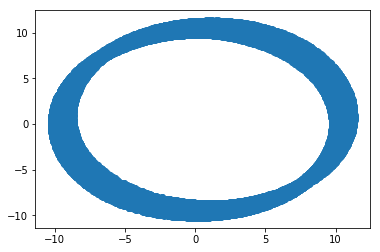

In [121]:
#graph of position of all scooters after t minutes
#all scooters have a constant magnitude and random direction between 0 and 2pi
t=400 #in minutes (1.5 mi/hr = 0.025 mi/min)
newx=[]
newy=[]
for i in range(len(data)):
    #print(x[i],y[i],xvel[i],yvel[i])
    newx.append(x[i]+xvel[i]*t)
    newy.append(y[i]+yvel[i]*t)
#plt.xlim(-0.35,1.5)
#plt.ylim(-0.35,1.5)
plt.scatter(newx,newy)

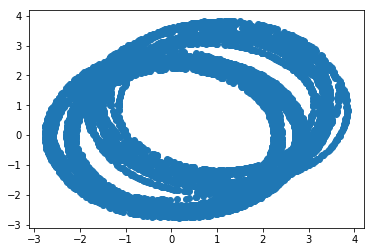

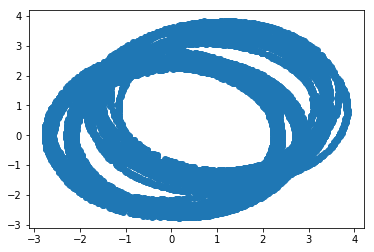

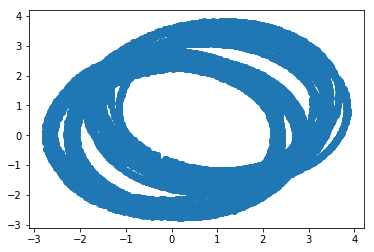

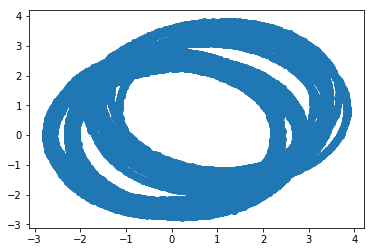

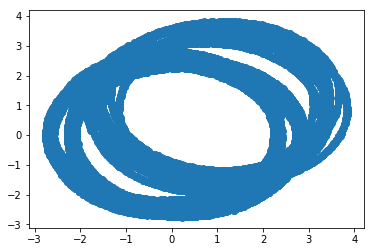

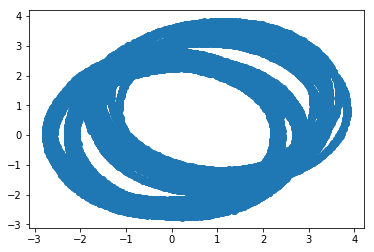

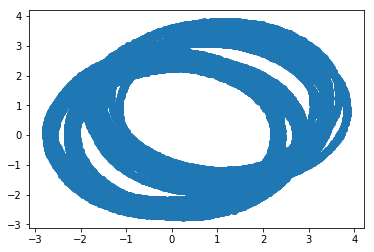

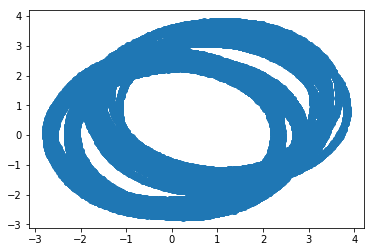

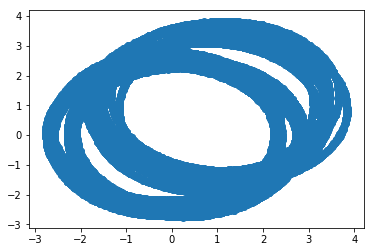

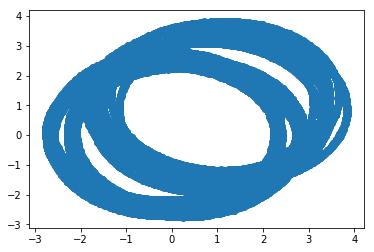

In [144]:
#simulation of position of all scooters over t minutes (10 evenly spaced graphs over time)
#chances of stopping is 50%
#takes a little decently long time if t is large
t=1000 #in minutes (1.5 mi/hr = 0.025 mi/min)
newx=[]
newy=[]
for j in range(0,t):
    for i in range(len(data)):
        #print(x[i],y[i],xvel[i],yvel[i])
        randomNum2 = random.randint(0,2)
        if (randomNum2==0):
            newx.append(x[i]+xvel[i]*(t//10))
            newy.append(y[i]+yvel[i]*(t//10))
        else:
            randomNum = random.randint(0,6283)/1000.0
            xvel[i]=(0.025*math.cos(randomNum))
            yvel[i]=(0.025*math.sin(randomNum))
    if (j%t//10==0):
        plt.scatter(newx,newy)
        plt.show()
#plt.xlim(-0.35,1.5)
#plt.ylim(-0.35,1.5)

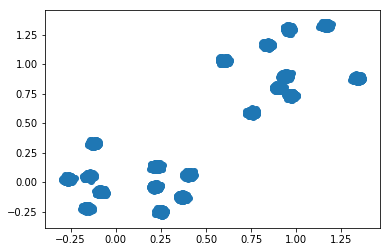

In [46]:
plt.scatter(x,y)

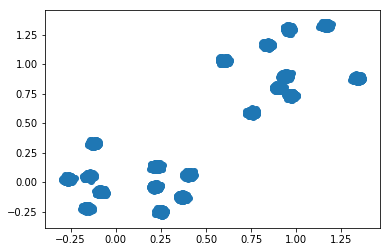

In [46]:
plt.scatter(x,y)

In [47]:
x=data[['xcoordinate']]
y=data[['ycoordinate']]
for i in range(len(data)):
    

SyntaxError: unexpected EOF while parsing (<ipython-input-47-4b74253723dd>, line 4)

In [ ]:
def dist(cx,cy,x,y,r):
    if (((x-cx)**2)+((y-cx)**2))**0.5<=r:
        return True
    return False

In [135]:
group1=0
group2=0
group3=0
group4=0
group5=0
group6=0
group7=0
maxBatteryLevel=5
for i in range(len(data)):
    if (data.iloc[i,1]<0 and data.iloc[i,2]<0.5):
        group1+=1
    if (data.iloc[i,1]>0 and data.iloc[i,2]<0.30):
        group2+=1
    if (data.iloc[i,1]>0.5 and data.iloc[i,2]>0.5):
        group3+=1
    if (data.iloc[i,1]<0 and data.iloc[i,2]<0.5 and data.iloc[i,3]<maxBatteryLevel):
        group4+=1
    if (data.iloc[i,1]>0 and data.iloc[i,2]<0.30 and data.iloc[i,3]<maxBatteryLevel):
        group5+=1
    if (data.iloc[i,1]>0.5 and data.iloc[i,2]>0.5 and data.iloc[i,3]<maxBatteryLevel):
        group6+=1
    if (data.iloc[i,1]>0.85 and data.iloc[i,1]<1.05 and data.iloc[i,2]>0.7 and data.iloc[i,2]<0.9  and data.iloc[i,3]<maxBatteryLevel):
        group7+=1
print('left-most group = ' + str(group1))
print('middle group = ' + str(group2))
print('right-most group = ' + str(group3))
print('left-most group = ' + str(group4))
print('middle group = ' + str(group5))
print('right-most group = ' + str(group6))
print(group4+group5+group6)
print('total = ' + str(len(data)))
print('small triple clumb = ' + str(group7))

left-most group = 5813
middle group = 7919
right-most group = 11936
left-most group = 4864
middle group = 6554
right-most group = 9907
21325
total = 25668
small triple clumb = 2983


In [ ]:
topRightSmallClump=0
for i in range(len(data)):
    if (dist(0.9,0.8,data.iloc[i,1], data.iloc[i,2], 0.22)):
        topRightSmallClump+=1
print(topRightSmallClump)

In [ ]:
clump=0
for i in range(len(data)):
    if (dist(-0.125,0.35,data.iloc[i,1], data.iloc[i,2], 0.13)):
        clump+=1
print(clump)

In [ ]:
x=[]
y=[]
for i in range(len(data)):
    if (data.iloc[i,3]==5):
        x.append(data.iloc[i,1])
        y.append(data.iloc[i,2])
plt.scatter(x,y)

In [ ]:
from scipy.spatial import ConvexHull
def minimum_bounding_rectangle(points):
    """
    Find the smallest bounding rectangle for a set of points.
    Returns a set of points representing the corners of the bounding box.

    :param points: an nx2 matrix of coordinates
    :rval: an nx2 matrix of coordinates
    """
    from scipy.ndimage.interpolation import rotate
    pi2 = np.pi/2.

    # get the convex hull for the points
    hull_points = points[ConvexHull(points).vertices]

    # calculate edge angles
    edges = np.zeros((len(hull_points)-1, 2))
    edges = hull_points[1:] - hull_points[:-1]

    angles = np.zeros((len(edges)))
    angles = np.arctan2(edges[:, 1], edges[:, 0])

    angles = np.abs(np.mod(angles, pi2))
    angles = np.unique(angles)

    # find rotation matrices
    # XXX both work
    rotations = np.vstack([
        np.cos(angles),
        np.cos(angles-pi2),
        np.cos(angles+pi2),
        np.cos(angles)]).T
#     rotations = np.vstack([
#         np.cos(angles),
#         -np.sin(angles),
#         np.sin(angles),
#         np.cos(angles)]).T
    rotations = rotations.reshape((-1, 2, 2))

    # apply rotations to the hull
    rot_points = np.dot(rotations, hull_points.T)

    # find the bounding points
    min_x = np.nanmin(rot_points[:, 0], axis=1)
    max_x = np.nanmax(rot_points[:, 0], axis=1)
    min_y = np.nanmin(rot_points[:, 1], axis=1)
    max_y = np.nanmax(rot_points[:, 1], axis=1)

    # find the box with the best area
    areas = (max_x - min_x) * (max_y - min_y)
    best_idx = np.argmin(areas)

    # return the best box
    x1 = max_x[best_idx]
    x2 = min_x[best_idx]
    y1 = max_y[best_idx]
    y2 = min_y[best_idx]
    r = rotations[best_idx]

    rval = np.zeros((4, 2))
    rval[0] = np.dot([x1, y2], r)
    rval[1] = np.dot([x2, y2], r)
    rval[2] = np.dot([x2, y1], r)
    rval[3] = np.dot([x1, y1], r)

    return rval

In [ ]:
for n in range(10):
    points = np.random.rand(4,2)
    plt.scatter(points[:,0], points[:,1])
    bbox = minimum_bounding_rectangle(points)
    plt.fill(bbox[:,0], bbox[:,1], alpha=0.2)
    plt.axis('equal')
    plt.show()

In [147]:
battery0=0
battery1=0
battery2=0
battery3=0
battery4=0
battery5=0
for i in range(len(data)):
    if (data.iloc[i,3]==5):
        battery5+=1
    if (data.iloc[i,3]==4):
        battery4+=1
    if (data.iloc[i,3]==3):
        battery3+=1
    if (data.iloc[i,3]==2):
        battery2+=1
    if (data.iloc[i,3]==1):
        battery1+=1
    if (data.iloc[i,3]==0):
        battery0+=1
print(battery0,battery1,battery2,battery3,battery4,battery5)
print(battery0+battery1+battery2+battery3+battery4)

4388 4248 4245 4160 4284 4343
21325
